In [21]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Manipulate the device and the precision

The point is to understand the basic pytorch structure which is a Tensor, typically a multi-dimensional matrix which contains a certain type 'dtype' data  

In [22]:
with_cuda = torch.cuda.is_available()
if with_cuda : 
    device = torch.device("cuda")
else : 
    device = torch.device("cpu") #by default

In [29]:
x = torch.randn(10, device = device )
print(x)

x = torch.randn(10, device = device, dtype = torch.float16) #the degree of precision we want to have
print(x)

x = torch.randn(5, device = device)
x = x.to(device)
print(x)

x = torch.randn(5)
x = x.to(device = device, dtype = torch.float16)
print(x)



tensor([-0.1967, -1.3958,  0.3857,  0.0059,  0.6488, -0.1323,  1.8120, -0.8132,
         0.2035,  1.8036])
tensor([ 1.9082, -0.8696, -0.0415, -0.0483,  2.0312, -0.8687, -0.4263,  0.1675,
        -0.7954, -0.9126], dtype=torch.float16)
tensor([ 0.7332, -1.3008,  0.9171, -0.9777,  0.3466])
tensor([ 0.9038, -0.0241,  0.7373, -0.3384,  1.2129], dtype=torch.float16)


# Backpropagation of the gradient

## Parameters and tensors

**Question 1**

Build some `torch.nn.Parameter`, some `torch.Tensor` and some `torch.Tensor` with `requires_grad = True`.

In [34]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.rand(5)
b = torch.rand(1).squeeze()
c = torch.randn(3, 4, requires_grad = True)

print(x1, "requires_grad:", x1.requires_grad)
print(x2, "requires_grad:", x2.requires_grad)
print(a, "requires_grad:", a.requires_grad)
print(b)
print(c)


Parameter containing:
tensor([ 0.1957,  1.4508, -0.9671,  0.1087,  2.3250], requires_grad=True) requires_grad: True
Parameter containing:
tensor(-0.8408, requires_grad=True) requires_grad: True
tensor([0.8455, 0.2452, 0.9908, 0.5523, 0.8587]) requires_grad: False
tensor(0.8857)
tensor([[-0.6282,  0.5380,  1.2627, -0.9518],
        [-1.0271,  0.6482, -1.2423, -0.3486],
        [-1.0635,  0.4053,  0.3507, -0.6813]], requires_grad=True)


## Computing gradients

**Question 2**

Let $f$ be the function defined below. Compute its derivative with respect to `x1` and `x2` by using `backward`, and then by using `torch.autograd.grad`.

In [ ]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.rand(5)
b = torch.rand(1).squeeze()

y = x2 * torch.sin((a * x1).sum() + b)

print(x1.grad, x2.grad)
y.backward()
print(x1.grad, x2.grad)
print(y.grad_fn)
print(y.grad_fn.next_functions)

None None
tensor([0.1504, 0.0669, 0.1562, 0.1780, 0.2217]) tensor(0.8756)
((<AccumulateGrad object at 0x000001EC7C465990>, 0), (<SinBackward0 object at 0x000001EC7C466200>, 0))


Torch.autograd.grad

In [47]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.rand(5)
b = torch.rand(1).squeeze()

y = x2 * torch.sin((a * x1).sum() + b)
out = torch.autograd.grad(y, (x1, x2)) #with x1 and x2 being two parameters required for the GD

print(out)
dervwrtx1 = out[0]
dervwrtx2 = out[1]

print(dervwrtx2)
print(dervwrtx1)

(tensor([-0.1982, -0.1316, -0.1404, -0.0363, -0.0148]), tensor(-0.2963))
tensor(-0.2963)
tensor([-0.1982, -0.1316, -0.1404, -0.0363, -0.0148])


High order derivatives


**Question 3**

Compute $\frac{\partial f}{\partial x_1 \partial x_2}$ by using `torch.autograd.grad` twice. One check how to use the additional parameters `create_graph` and `allow_unused`.

In [66]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.randn(5)
b = torch.randn(1).squeeze()

y = x2 * torch.sin((a * x1).sum() + b)

grad_x1, grad_x2 = torch.autograd.grad(y, (x1, x2), create_graph = True, allow_unused = True)

hessian = torch.autograd.grad(grad_x2, (x1, ))

print(hessian)

#se renseigner sur comment regarder la taille d'un tensor, autre que sa dimension, peut -etre traduire en 
#tableau numpy ?


(tensor([-0.7695, -0.3503,  0.9337,  1.7783,  0.5225]),)


Forwar-only mode 

In [74]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.randn(5)
b = torch.randn(1).squeeze()


with torch.no_grad():
    y = x2 * torch.sin((a * x1).sum() + b)

print(y)

print(x1.grad, x2.grad)




tensor(0.6873)
None None


In [77]:
x1 = torch.nn.Parameter(torch.randn(5))
x2 = torch.nn.Parameter(torch.randn(1).squeeze())
a = torch.randn(5)
b = torch.randn(1).squeeze()

y = x2.detach() * torch.sin((a * x1.detach()).sum() + b)



Managing a Dataset


In [79]:
datasets_path = "/home/camduss/datatsets"

In [81]:
batch_size = 64

# build transform
transform = transforms.Compose([
    transforms.ToTensor(),
    ]) 

# choose the training and test datasets
train_data = datasets.MNIST(datasets_path, train = True,
                              download = True, transform = transform)
test_data = datasets.MNIST(datasets_path, train=False,
                             download = True, transform = transform)

train_size = len(train_data)
test_size = len(test_data)

# build the data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)

# specify the image classes
classes = [f"{i}" for i in range(10)]

100%|██████████| 9.91M/9.91M [00:01<00:00, 9.14MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 207kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.27MB/s]


**Question 1**

By using `numpy.random.choice`, subplots and the function `imshow` of matplotlib, print 10 (or more) random data points of the training set (image + label).

Is the task feasible for a human? Do the data look clean ?

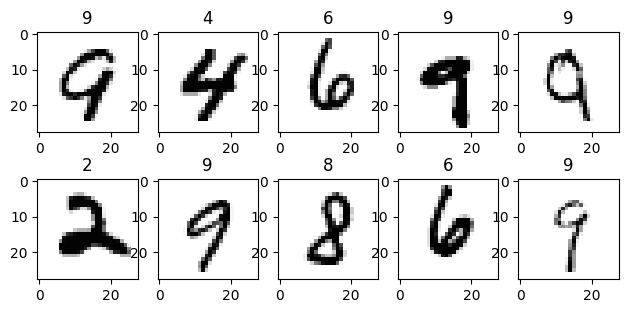

In [85]:
lst_idx = np.random.choice(train_size, 10, replace = False)

fig, ax = plt.subplots(2, 5, figsize = (7.5, 3.5))

for i, idx in enumerate(lst_idx): 
    img, target = train_data[idx]
    ax[i//5, i%5].imshow(img.numpy().transpose(1, 2, 0), cmap="Greys")
    ax[i//5, i%5].set_title(classes[target])
    


**Question 2**

In classification tasks, it is common that the different classes are inequally represented in the dataset. If this "class imbalance" is too severe, the model is likely to fail to learn well the least represented classes.

Compute the number of data points in each class (in the training dataset). What do we observe?

In [92]:
nb_data_per_class = 0

for img, target in train_loader:
    nb_data_per_class+=torch.bincount(target)

print(nb_data_per_class)

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])


Managing a model /
Building a CNN


In [111]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        #define the activation function 
        self.act_function = torch.tanh
        layers = [1, 6, 16, 120, 84, 10]

        #on définit les couches de convolutions et d'activation 
        self.conv1= torch.nn.Conv2d(layers[0], layers[1], 5, padding = 2)
        #from fc1 to fc2, we should have that the intput channels of fc2 is the output channels of fc1
        self.conv2 = torch.nn.Conv2d(layers[1], layers[2], 5)
        #fc1 : size of the kernel times the output of fc2 and layers 3
        self.fc1 = torch.nn.Linear(5*5*layers[2], layers[3]) 
        self.fc2 = torch.nn.Linear(layers[3], layers[4])
        self.fc3 = torch.nn.Linear(layers[4], layers[5])



    def forward(self, x):
            x = self.conv1(x)
            x = self.act_function(x)
            x = torch.nn.functional.max_pool2d(x, 2)

            x = self.conv2(x)
            x = self.act_function(x)
            x = torch.nn.functional.max_pool2d(x, 2)

            x = x.view(x.size(0), -1)

            x = self.fc1(x)
            x = self.act_function(x)

            x = self.fc2(x)
            x = self.act_function(x)

            x = self.fc3(x)
            x = torch.nn.functional.log_softmax(x, dim=1)

            return x

        


**Question 1**

When a `torch.nn.Module` is created, its parameters and its submodules are automatically registered, which is necessary to optimize them with an `Optimizer`. One can access them with the methods `named_parameters`, `parameters`, `named_modules`, `modules`.

Access the various elements on an instance of LeNet.

In [100]:
model = LeNet()





print(list(model.named_parameters()))
print(list(model.parameters()))
print(list(model.named_modules()))
print(list(model.modules()))

[('conv1.weight', Parameter containing:
tensor([[[[-0.0853,  0.0259, -0.1353, -0.1591,  0.1841],
          [-0.0578, -0.1340,  0.1382, -0.0614, -0.1107],
          [ 0.0715, -0.1830,  0.1895, -0.0060, -0.0329],
          [ 0.0978,  0.1967,  0.1908,  0.1854,  0.1111],
          [ 0.1166, -0.0787,  0.0061,  0.0560, -0.1067]]],


        [[[ 0.1763,  0.0658,  0.0384, -0.0494, -0.0980],
          [-0.0579,  0.0167, -0.0629, -0.1563,  0.0857],
          [ 0.1075, -0.1408,  0.1752, -0.1713,  0.1558],
          [ 0.1045, -0.1933, -0.1849,  0.0725,  0.1523],
          [ 0.1928,  0.1108, -0.0329,  0.1358,  0.0879]]],


        [[[-0.0225,  0.0709,  0.1168,  0.0247, -0.1249],
          [ 0.0682, -0.0889,  0.0442,  0.0234, -0.0219],
          [-0.0119,  0.1589,  0.0332,  0.1510,  0.0026],
          [ 0.1021,  0.1403, -0.1616,  0.1320,  0.1635],
          [-0.1633, -0.0975, -0.1950, -0.1938,  0.0261]]],


        [[[-0.1310, -0.0213, -0.1168,  0.1326,  0.0142],
          [-0.1107, -0.1345,  0.0002

**Question 2**

Create an instance of the class below and print its modules and parameters. What do we observe? Fix this issue by using the object `torch.nn.ModuleList`.

In [ ]:
class SomeModel(nn.Module):
    def __init__(self):
        super(SomeModel, self).__init__()

        self.layers = torch.nn.ModuleList([torch.nn.Linear(6, 6), torch.nn.ReLU(), torch.nn.Linear(6, 1)]) #need of a list in terms of module, not jsut a typical array

    def forward(self, x):
        for i in self.layers : 
            x = i(x)
        return x

In [105]:
model1 = SomeModel()

print(list(model1.named_parameters()))
print(list(model1.parameters()))
print(list(model1.modules()))

[('layers.0.weight', Parameter containing:
tensor([[ 0.2439, -0.0118, -0.2720,  0.4013, -0.1016,  0.1192],
        [-0.0368, -0.2211, -0.2109,  0.2396,  0.0240, -0.3616],
        [-0.3807,  0.3916, -0.3530, -0.3158,  0.0021, -0.1602],
        [ 0.2817, -0.1004, -0.0932,  0.2453,  0.3340,  0.2400],
        [-0.1019, -0.1456,  0.0620, -0.1090, -0.0927, -0.1850],
        [ 0.1231,  0.0769, -0.0406,  0.3607, -0.0891, -0.2938]],
       requires_grad=True)), ('layers.0.bias', Parameter containing:
tensor([-0.3880, -0.3139, -0.3710,  0.2403,  0.1253, -0.2949],
       requires_grad=True)), ('layers.2.weight', Parameter containing:
tensor([[-0.1638, -0.1463,  0.3491, -0.2572, -0.1089, -0.0021]],
       requires_grad=True)), ('layers.2.bias', Parameter containing:
tensor([-0.2893], requires_grad=True))]
[Parameter containing:
tensor([[ 0.2439, -0.0118, -0.2720,  0.4013, -0.1016,  0.1192],
        [-0.0368, -0.2211, -0.2109,  0.2396,  0.0240, -0.3616],
        [-0.3807,  0.3916, -0.3530, -0.3158,

**Question 3 (optional)**

Check out the method `register_buffer` of `Module`, explain why it can be useful and show a use-case.

## Training a model 

In [113]:
def train_model(model, criterion, optimizer, nepochs):
    #List to store loss to visualize
    valid_loss_min = np.inf # track change in validation loss

    train_losses = []
    test_losses = []
    acc_eval = []
    #test_counter = [i*len(train_loader.dataset) for i in n_epochs]

    for epoch in range(nepochs):
        # keep track of training and validation loss
        train_loss = 0.
        valid_loss = 0.

        model.train()

        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.to(device = device)
            print(data.size())
            target = target.to(device = device)
            break 
            
            optimizer.zero_grad() #clear the gradients (previously computed)

            out = model(data) #compute the output of the model

            loss = criterion(out, target) #calculate the loss for this output

            loss.backward() #compute the gradient of the loss to guide the optimisation

            optimizer.step() #optimize

            train_loss += loss.item()*data.size(0) #keep track of the loss

        model.eval()
        correct = 0
        for data, target in test_loader:
            with torch.no_grad():
                data = data.to(device = device)
                target = target.to(device = device)

                output = model(data)
                loss = criterion(output, target)

                valid_loss += loss.item()*data.size(0)
                pred = output.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum().item()


        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(test_loader.dataset)
        acc_eval.append(correct/len(test_loader.dataset)*100)
        train_losses.append(train_loss)
        test_losses.append(valid_loss)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

In [115]:
model = LeNet().to(device = device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr =.01)

nepochs = 5

train_model(model, criterion, optimizer, nepochs)

torch.Size([64, 1, 28, 28])
Epoch: 0 	Training Loss: 0.000000 	Validation Loss: 2.307807
torch.Size([64, 1, 28, 28])
Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 2.307807
torch.Size([64, 1, 28, 28])
Epoch: 2 	Training Loss: 0.000000 	Validation Loss: 2.307807
torch.Size([64, 1, 28, 28])
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 2.307807
torch.Size([64, 1, 28, 28])
Epoch: 4 	Training Loss: 0.000000 	Validation Loss: 2.307807


Loading a model with checkpoints

## Data normalization

**Question 3**

To make sure that the inputs of the neural network are within a controlled range, we usually transform the dataset to be sure that the data are centered with variance 1. It is not always necessary, but it is worth knowing it.

Check the range of values on a sample of MNIST. Compute the mean and the standard deviation of the training dataset of MNIST and normalize the dataset accordingly by using `transforms.Normalize`.

In [137]:
mean = 0

total_sum = 0
for img, target in train_loader:
    total_sum +=img.sum()

mean = total_sum / (28**2 * len(train_loader.dataset))

print(mean)

std_dev = 0
for img, target in train_loader:
    std_dev += (img - mean).pow(2).sum()
std_dev = (std_dev / (28**2 * len(train_loader.dataset))).sqrt()

print(std_dev)


tensor(-7.1476e-08)
tensor(1.0000)


In [140]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean, std_dev)
    ])

train_data = datasets.MNIST(datasets_path, train = True, transform = transform, download = True)
test_data = datasets.MNIST(datasets_path, train = False, transform = transform, download = True )

train_size = len(train_data)
test_size = len(test_data)

train_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size, shuffle = False)

classes = [f"{i}" for i in range(10)]



AttributeError: 'Compose' object has no attribute 'Compose'

## Data augmentation

**Question 4**

It is very common to face overfitting when doing deep learning. So, several methods can be used to solve this problem. One of them is called "data augmentation". It consists in adding "noise" to data points of the training dataset in order to make the model resistant to small changes of the data. 

When training on images, it is common to perform "random crops", "random flips", and small "random rotations". With MNIST, it is meaningless to add random flips, because most digits are not supposed to be invariant by vertical or horizontal symmetries.

Add random crops with `transforms.RandomCrop` with a reasonable number of pixels to the transforms to do on the dataset, visualize the resulting images and train the model.

In [136]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomCrop(28, padding = 3)
]) 





AttributeError: 'Compose' object has no attribute 'Compose'

## Influence of the initialization

**Question 5**

Build a Multilayer Perceptron with ReLU activation functions, which takes 3 arguments: 
 * `layers`: the list of layer sizes;
 * `sigma_w`: the standard deviation chosen for initializing the weights;
 * `with_scaling`: if True, we multiply the generated weights by $1/\sqrt{\# \text{inputs}}$.

Write the `reset_parameters` method, which initialize the weights according to a Gaussian distribution, either with variance $\sigma_w^2$, or $\sigma_w^2/\# \text{inputs}$.

In [ ]:
class Perceptron(torch.nn.Module):
    def __init__(self, layers, sigma_w, scaling = False):
        super(Perceptron, self).__init__()
        
        self.act_function = torch.relu
        self.scaling = scaling
        self.sigma_w = sigma_w

        self.layers = torch.nn.ModuleList()
        for l_in, l_out in zip(layers[:-1], layers[1:]):
            self.layers.append(nn.Linear(l_in, l_out))
        self.nb_layers = len(self.layers)

        self.reset_parameters()
         

    def reset_parameters(self):
        with torch.no_grad():
            for i, l in enumerate(self.layers):
                l.weight.data.normal_()
                l.weight.data.mul(self.sigma_w)

                if self.scaling : 
                    l.weight.data.div_(np.sqrt(l.weight.size(1)))

                l.biais.data.zero_()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers[:-1]:
            x = l(x)
            x = self.act_function(x)
                                       
        x = self.layers[-1](x)
        x = torch.nn.functional.log_softmax(x, dim = 1)

        return x